## Review and Business Stars EDA

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import datetime

import seaborn as sns
# sns.set()
sns.set_style('whitegrid')
sns.set_context("poster")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Import Review Data - United States Restaurant Reviews Only

In [2]:
print('[%s] Loading Review Data...' % datetime.datetime.now().time())

morning_commutes = pd.DataFrame()
data_file = './clean_data/_analysis/restaurant_reviews_united_states.csv'

# Chunk Settings
chunks = []
chunk_counter = 1
chunksize = 10000
num_chunks = math.ceil(sum(1 for row in open(data_file, 'r'))/chunksize)

# import file in chunks
for chunk in pd.read_csv(data_file, chunksize=chunksize, iterator=True, index_col=0):
        
    # append chunk to chunks list
    chunks.append(chunk)

    if chunk_counter == 1 or chunk_counter % math.ceil(num_chunks/10) == 0 or chunk_counter == num_chunks:
        print('\t\t[%s] finished chunk %s of %s' % (datetime.datetime.now().time(), chunk_counter, num_chunks))
    chunk_counter += 1

reviews = pd.concat(chunks)
reviews.reset_index(inplace=True, drop=True)
print('[%s] Complete!' % datetime.datetime.now().time())

[18:37:40.000055] Loading Review Data...
		[18:37:44.454820] finished chunk 1 of 441
		[18:37:50.687218] finished chunk 45 of 441
		[18:37:57.183911] finished chunk 90 of 441
[18:38:04.895642] Complete!


## Exploration

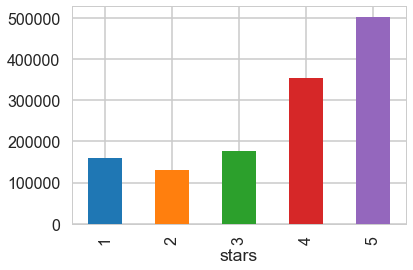

In [3]:
reviews.groupby('stars').count()['business_id'].plot(kind='bar')
plt.show()
plt.close()

### Distribution of All Star Ratings in US Restaurants

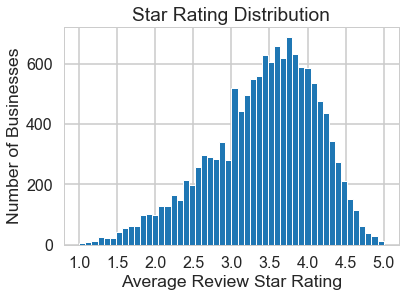

In [4]:
grp = reviews.groupby('business_id')
counts = grp.business_id.count()
means = grp.stars.mean()

means[counts > 10].hist(bins=50, edgecolor='w', lw=1)

plt.xticks([x*0.5 for x in range(2,11)])

plt.title('Star Rating Distribution')
plt.xlabel('Average Review Star Rating')
plt.ylabel('Number of Businesses')
plt.show()
plt.close()



### Distribution of Positive Star Ratings in US Restaurants
<p>Restaurants with a mean Star Rating greater than 3.0</p>

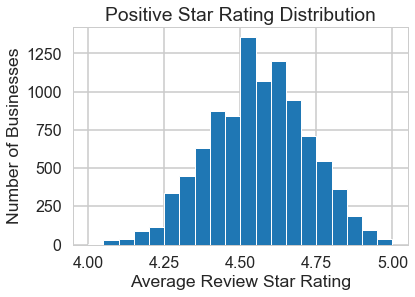

In [5]:
pos_reviews = reviews[reviews.stars > 3].copy()

grp = pos_reviews.groupby('business_id')
counts = grp.business_id.count()
means = grp.stars.mean()

means[counts > 10].hist(bins=20, edgecolor='w', lw=1)

plt.xticks([x*0.25 for x in range(16,21)])

plt.title('Positive Star Rating Distribution')
plt.xlabel('Average Review Star Rating')
plt.ylabel('Number of Businesses')
plt.show()
plt.close()


### Distribution of Negative Star Ratings in US Restaurants
<p>Restaurants with a mean Star Rating less than 3.0</p>

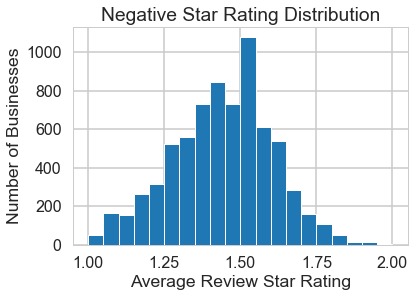

In [6]:
neg_reviews = reviews[reviews.stars < 3].copy()

grp = neg_reviews.groupby('business_id')
counts = grp.business_id.count()
means = grp.stars.mean()

means[counts > 10].hist(bins=20, edgecolor='w', lw=1)

plt.xticks([x*0.25 for x in range(4,9)])

plt.title('Negative Star Rating Distribution')
plt.xlabel('Average Review Star Rating')
plt.ylabel('Number of Businesses')
plt.show()
plt.close()



## Load Business Data

In [7]:
print('Started Loading Station Data...')
file_path_slug = './clean_data/business/*.csv'
file_list = glob(file_path_slug)

business = pd.DataFrame()

counter = 1
chunks = []

for file in file_list:
    
    chunk_counter = 1
    num_chunks = math.ceil(sum(1 for row in open(file, 'r'))/10000)
    
    for chunk in pd.read_csv(file, chunksize=10000, iterator=True, index_col=0):
        
        chunk = chunk[chunk.business_id.isin(reviews.business_id.unique())].copy()

        # append chunk to chunks list
        chunks.append(chunk)

    print('Finished file! (%d of %d)' % (counter, len(file_list)))
    counter += 1
    
business = pd.concat(chunks)

business.reset_index(inplace=True, drop=True)

print('Data Loaded Successfully!')

Started Loading Station Data...


/Users/samgutentag/anaconda/envs/spring/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (28,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Finished file! (1 of 64)


/Users/samgutentag/anaconda/envs/spring/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (28,60,61,62,63,64,65,66,77,78,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Finished file! (2 of 64)


/Users/samgutentag/anaconda/envs/spring/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Finished file! (3 of 64)
Finished file! (4 of 64)
Finished file! (5 of 64)


/Users/samgutentag/anaconda/envs/spring/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (28,40,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Finished file! (6 of 64)
Finished file! (7 of 64)
Finished file! (8 of 64)
Finished file! (9 of 64)
Finished file! (10 of 64)
Finished file! (11 of 64)
Finished file! (12 of 64)
Finished file! (13 of 64)
Finished file! (14 of 64)
Finished file! (15 of 64)
Finished file! (16 of 64)
Finished file! (17 of 64)
Finished file! (18 of 64)
Finished file! (19 of 64)


/Users/samgutentag/anaconda/envs/spring/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (28,60,61,62,63,64,65,66,77,78,79,80,81,82,83,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Finished file! (20 of 64)
Finished file! (21 of 64)
Finished file! (22 of 64)
Finished file! (23 of 64)
Finished file! (24 of 64)
Finished file! (25 of 64)
Finished file! (26 of 64)
Finished file! (27 of 64)
Finished file! (28 of 64)
Finished file! (29 of 64)
Finished file! (30 of 64)
Finished file! (31 of 64)
Finished file! (32 of 64)


/Users/samgutentag/anaconda/envs/spring/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Finished file! (33 of 64)
Finished file! (34 of 64)
Finished file! (35 of 64)
Finished file! (36 of 64)
Finished file! (37 of 64)
Finished file! (38 of 64)
Finished file! (39 of 64)
Finished file! (40 of 64)
Finished file! (41 of 64)
Finished file! (42 of 64)
Finished file! (43 of 64)
Finished file! (44 of 64)
Finished file! (45 of 64)
Finished file! (46 of 64)
Finished file! (47 of 64)
Finished file! (48 of 64)
Finished file! (49 of 64)
Finished file! (50 of 64)
Finished file! (51 of 64)
Finished file! (52 of 64)
Finished file! (53 of 64)
Finished file! (54 of 64)
Finished file! (55 of 64)
Finished file! (56 of 64)
Finished file! (57 of 64)


/Users/samgutentag/anaconda/envs/spring/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (60,61,62,63,64,65,66,77,78,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Finished file! (58 of 64)
Finished file! (59 of 64)
Finished file! (60 of 64)
Finished file! (61 of 64)
Finished file! (62 of 64)
Finished file! (63 of 64)
Finished file! (64 of 64)
Data Loaded Successfully!


### Create dataframe with business Star Rating, and mean of ratings from reviews

In [8]:
ratings = business[['business_id','name', 'stars']].copy()
ratings.set_index('business_id', inplace=True, drop=True)
ratings.columns = ['name', 'stars']
ratings.head(3)

,name,stars
business_id,,
6YGQcH6v5ndd-Q4ovVRLDQ,Casa Rita's,3.5
6zjv75DW7a_XkYiBBb3S7A,Tio Julios,3.0
6tl_UiTs8uqZO3iSfdMZmA,Deemos American Grill,2.0


In [9]:
review_stars = reviews.groupby('business_id')['stars'].mean().to_frame()
ratings = ratings.merge(review_stars, left_index=True, right_index=True)
ratings = ratings.rename(columns={'stars_x':'biz_stars', 'stars_y':'review_stars'})

# round review stars to nearest 0.5
ratings['review_stars_rounded'] = round(ratings['review_stars']*2)/2

ratings.head(3)

,name,biz_stars,review_stars,review_stars_rounded
business_id,,,,
6YGQcH6v5ndd-Q4ovVRLDQ,Casa Rita's,3.5,3.50,3.5
6zjv75DW7a_XkYiBBb3S7A,Tio Julios,3.0,3.25,3.0
6tl_UiTs8uqZO3iSfdMZmA,Deemos American Grill,2.0,2.15,2.0


### Create a 'pos_stars' by rescaling reviews greater than 3 stars

In [10]:
# rescaled review scores
# throw out all reviews less than 3

pos_reviews = reviews[reviews.stars > 3].copy()

pos_reviews = pos_reviews.groupby('business_id')['stars'].mean().to_frame()

ratings = ratings.merge(pos_reviews, left_index=True, right_index=True)
ratings = ratings.rename(columns={'stars':'pos_review_stars'})

# round review stars to nearest 0.5
ratings['pos_review_stars_rounded'] = round(ratings['pos_review_stars']*2)/2
ratings.head(3)

,name,biz_stars,review_stars,review_stars_rounded,pos_review_stars,pos_review_stars_rounded
business_id,,,,,,
6YGQcH6v5ndd-Q4ovVRLDQ,Casa Rita's,3.5,3.50,3.5,4.676471,4.5
6zjv75DW7a_XkYiBBb3S7A,Tio Julios,3.0,3.25,3.0,5.000000,5.0
6tl_UiTs8uqZO3iSfdMZmA,Deemos American Grill,2.0,2.15,2.0,4.000000,4.0


### Create a 'neg_stars' by rescaling reviews less than 3 stars

In [11]:
# rescaled review scores
# throw out all reviews less than 3

neg_reviews = reviews[reviews.stars < 3].copy()

neg_reviews = neg_reviews.groupby('business_id')['stars'].mean().to_frame()

ratings = ratings.merge(neg_reviews, left_index=True, right_index=True)
ratings = ratings.rename(columns={'stars':'neg_review_stars'})

# round review stars to nearest 0.5
ratings['neg_review_stars_rounded'] = round(ratings['neg_review_stars']*2)/2

ratings.head(3)

,name,biz_stars,review_stars,review_stars_rounded,pos_review_stars,pos_review_stars_rounded,neg_review_stars,neg_review_stars_rounded
business_id,,,,,,,,
6YGQcH6v5ndd-Q4ovVRLDQ,Casa Rita's,3.5,3.50,3.5,4.676471,4.5,1.611111,1.5
6zjv75DW7a_XkYiBBb3S7A,Tio Julios,3.0,3.25,3.0,5.000000,5.0,1.500000,1.5
6tl_UiTs8uqZO3iSfdMZmA,Deemos American Grill,2.0,2.15,2.0,4.000000,4.0,1.571429,1.5


### Rescale 'pos_stars' and 'neg_stars' reviews

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

ratings['normed_pos_stars'] = scaler.fit_transform(ratings.pos_review_stars.values.reshape(-1,1))*5.0
ratings['normed_neg_stars'] = scaler.fit_transform(ratings.neg_review_stars.values.reshape(-1,1))*5.0

ratings['normed_pos_stars_rounded'] = round(ratings['normed_pos_stars']*2)/2
ratings['normed_neg_stars_rounded'] = round(ratings['normed_neg_stars']*2)/2
ratings.head(3)

,name,biz_stars,review_stars,review_stars_rounded,pos_review_stars,pos_review_stars_rounded,neg_review_stars,neg_review_stars_rounded,normed_pos_stars,normed_neg_stars,normed_pos_stars_rounded,normed_neg_stars_rounded
business_id,,,,,,,,,,,,
6YGQcH6v5ndd-Q4ovVRLDQ,Casa Rita's,3.5,3.50,3.5,4.676471,4.5,1.611111,1.5,3.382353,3.055556,3.5,3.0
6zjv75DW7a_XkYiBBb3S7A,Tio Julios,3.0,3.25,3.0,5.000000,5.0,1.500000,1.5,5.000000,2.500000,5.0,2.5
6tl_UiTs8uqZO3iSfdMZmA,Deemos American Grill,2.0,2.15,2.0,4.000000,4.0,1.571429,1.5,0.000000,2.857143,0.0,3.0


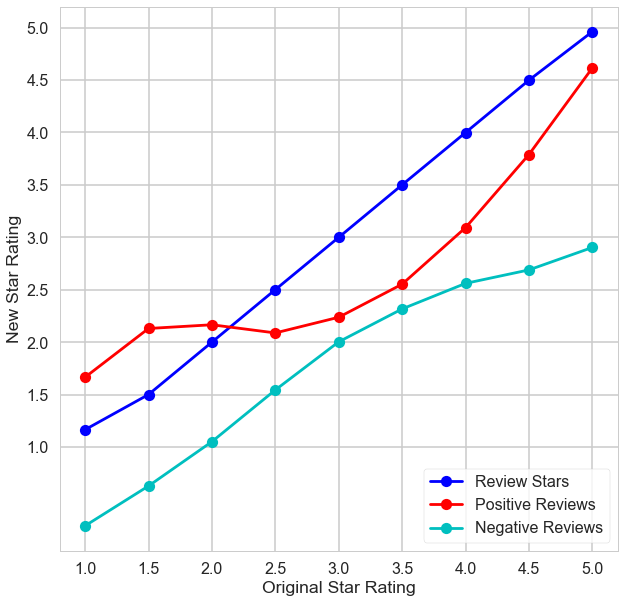

In [13]:
ratings.groupby('biz_stars').mean()['review_stars_rounded'].plot(figsize=(10,10), marker='o', color='b')
ratings.groupby('biz_stars').mean()['normed_pos_stars_rounded'].plot(marker='o', color='r')
ratings.groupby('biz_stars').mean()['normed_neg_stars_rounded'].plot(marker='o', color='c')

plt.xticks([x*0.5 for x in range(2,11)])
plt.yticks([y*0.5 for y in range(2,11)])

plt.xlabel('Original Star Rating')
plt.ylabel('New Star Rating')
plt.legend(['Review Stars', 'Positive Reviews', 'Negative Reviews', 'Diffs'], loc=4, frameon=True)

plt.show()
plt.close()